In [20]:
#Import and load data

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
# Load cleaned data

data = pd.read_csv("../data/cleaned_student_performance.csv")

data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14003 entries, 0 to 14002
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   StudyHours            14003 non-null  int64
 1   Attendance            14003 non-null  int64
 2   Resources             14003 non-null  int64
 3   Extracurricular       14003 non-null  int64
 4   Motivation            14003 non-null  int64
 5   Internet              14003 non-null  int64
 6   Gender                14003 non-null  int64
 7   Age                   14003 non-null  int64
 8   LearningStyle         14003 non-null  int64
 9   OnlineCourses         14003 non-null  int64
 10  Discussions           14003 non-null  int64
 11  AssignmentCompletion  14003 non-null  int64
 12  ExamScore             14003 non-null  int64
 13  EduTech               14003 non-null  int64
 14  StressLevel           14003 non-null  int64
 15  FinalGrade            14003 non-null  int64
dtypes: i

In [22]:
# Feature Engineering

data["StudyEfficiency"] = data['StudyHours'] / (data['AssignmentCompletion'] + 1)
data["AttendanceRatio"] = data['Attendance'] / 100
data['TechAccess'] = data['Internet'] + data['Resources']
data['EngagementScore'] = data['Discussions'] + data['OnlineCourses'] + data['Extracurricular']
data['StressBalance'] = data['Motivation'] - data['StressLevel']

In [23]:
# Define features and target

# Target variable
y = data["FinalGrade"]

# Feature set
feature_cols = [
    "StudyHours",
    "Attendance",
    "AssignmentCompletion",
    "OnlineCourses",
    "Motivation",
    "Resources",
    "Internet",
    "Discussions",
    "StressLevel",
    "Extracurricular",
    "StudyEfficiency",
    'AttendanceRatio',
    'TechAccess',
    'EngagementScore',
    'StressBalance'
]

X = data[feature_cols]

X.head()

,StudyHours,Attendance,AssignmentCompletion,OnlineCourses,Motivation,Resources,Internet,Discussions,StressLevel,Extracurricular,StudyEfficiency,AttendanceRatio,TechAccess,EngagementScore,StressBalance
0,19,64,59,8,0,1,1,1,1,0,0.316667,0.64,2,9,-1
1,19,64,90,16,0,1,1,0,1,0,0.208791,0.64,2,16,-1
2,19,64,67,19,0,1,1,0,1,0,0.279412,0.64,2,19,-1
3,19,64,59,8,0,1,1,1,1,1,0.316667,0.64,2,10,-1
4,19,64,90,16,0,1,1,0,1,1,0.208791,0.64,2,17,-1


In [24]:
# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y #keep grade distribution similar in train/test
)

y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(FinalGrade
 0    0.273701
 2    0.258347
 1    0.236386
 3    0.231566
 Name: proportion, dtype: float64,
 FinalGrade
 0    0.273474
 2    0.258479
 1    0.236344
 3    0.231703
 Name: proportion, dtype: float64)

In [25]:
# Scale Numeric Features

numeric_features = ["StudyHours", "Attendance", "AssignmentCompletion", "OnlineCourses"]
categorical_encoded_features = [
    "Motivation",
    "Resources",
    "Internet",
    "Discussions",
    "StressLevel",
    "Extracurricular"
]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", "passthrough", categorical_encoded_features),
    ]
)

In [27]:
# Baseline Model: Multiclass Logistic Regression

log_reg_clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(
        solver="lbfgs",
        max_iter=1000,
        random_state=42
    ))
])

log_reg_clf

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [28]:
# Train the model

log_reg_clf.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [29]:
y_pred = log_reg_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.292

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.58      0.40       766
           1       0.28      0.03      0.06       662
           2       0.29      0.34      0.31       724
           3       0.28      0.16      0.20       649

    accuracy                           0.29      2801
   macro avg       0.28      0.28      0.24      2801
weighted avg       0.29      0.29      0.25      2801



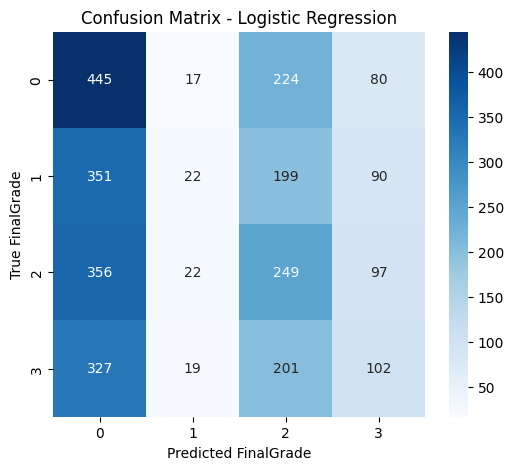

In [30]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=[0,1,2,3],
    yticklabels=[0,1,2,3]
)

plt.xlabel("Predicted FinalGrade")
plt.ylabel("True FinalGrade")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [31]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9025348089967868
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       766
           1       0.91      0.87      0.89       662
           2       0.91      0.92      0.91       724
           3       0.92      0.89      0.91       649

    accuracy                           0.90      2801
   macro avg       0.90      0.90      0.90      2801
weighted avg       0.90      0.90      0.90      2801



In [32]:
importances = rf.feature_importances_

feature_importance = pd.Series(importances, index=feature_cols).sort_values(ascending=False)
feature_importance

StudyEfficiency         0.156085
AssignmentCompletion    0.140749
StudyHours              0.116635
AttendanceRatio         0.104615
Attendance              0.103979
OnlineCourses           0.103089
EngagementScore         0.088507
StressLevel             0.039310
StressBalance           0.033046
Discussions             0.026278
Motivation              0.021992
TechAccess              0.021764
Resources               0.020510
Extracurricular         0.016920
Internet                0.006521
dtype: float64

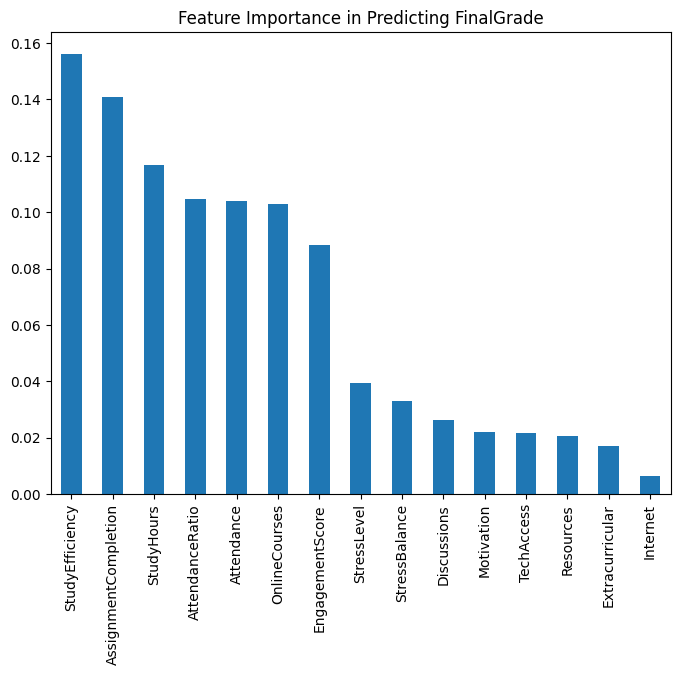

In [33]:
plt.figure(figsize=(8,6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance in Predicting FinalGrade")
plt.show()